# Dhanuka, Manas : Project 2

In [1]:
#importing packages
import csv
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.patches as mpatches

In [2]:
dt1 = pd.read_csv('02_df_mm_calc.csv') #Reading in the data

In [3]:
#Deleting first column
dt1.drop(dt1.columns[0], axis=1, inplace=True)
dt1.shape

(4171, 18)

In [4]:
#Extracting columns with univ as the target
univ = dt1[dt1["Target"] == "univ"]

In [5]:
dt1 = dt1[dt1["Target"] != "univ"]
dt1

,Target,Dataset,Sample_ID,Hive,Date,Bee_type,Scab,gut_mg,Extractor,Cq,SD,actin_Cq,actin_CopyNum,CopyNum,CellNum,Present,CopyNum_norm,CellNum_norm
0,Ba,mm,1,DdM,150411,F,0,NaN,PLO,29.706233,0.076765,20.679800,9.914533e+06,3.199835e+04,1.599918e+04,1,31194,15597
1,Ba,mm,596,DdM,170420,F,1,NaN,M,27.367200,0.090368,19.732867,1.817049e+07,1.717219e+05,8.586095e+04,1,91342,45671
2,Ba,mm,506,DdM,161216,W,0,NaN,M,15.568233,0.019914,20.673167,9.956696e+06,8.235654e+08,4.117827e+08,1,799455269,399727635
3,Ba,mm,233,DdM,160113,W,0,NaN,M,15.196967,0.052419,20.826900,9.024065e+06,1.075277e+09,5.376387e+08,1,1151674188,575837094
4,Ba,mm,371,DdM,160715,F,1,NaN,P,26.112967,0.112793,22.766950,2.608447e+06,4.227693e+05,2.113846e+05,1,1566508,783254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,Sa,mm,502,DdM,161216,W,1,NaN,M,18.550167,0.010782,19.183833,2.581720e+07,1.203451e+08,3.008627e+07,1,45053700,11263425
3958,Sa,mm,32,DdM,150513,F,1,NaN,PLO,20.798833,0.027966,20.513267,1.102914e+07,2.631824e+07,6.579560e+06,1,23063571,5765893
3959,Sa,mm,26,DdM,150513,F,0,NaN,PLO,21.691067,0.036193,20.441667,1.154609e+07,1.439832e+07,3.599580e+06,1,12052810,3013203
3960,Sa,mm,394,DdM,160816,F,1,NaN,M,22.375400,0.010607,19.443500,2.186572e+07,9.065731e+06,2.266433e+06,1,4007286,1001822


# Figure 1A : Absolute  Abundance Analysis

In [6]:
# remove lines in which the target is not detected by removing "Present == 0"(to get mean cell number of non core targets only when they are detected by qPCR)
dtDetected = dt1[dt1["Present"]==1]
dtDetected

,Target,Dataset,Sample_ID,Hive,Date,Bee_type,Scab,gut_mg,Extractor,Cq,SD,actin_Cq,actin_CopyNum,CopyNum,CellNum,Present,CopyNum_norm,CellNum_norm
0,Ba,mm,1,DdM,150411,F,0,NaN,PLO,29.706233,0.076765,20.679800,9.914533e+06,3.199835e+04,1.599918e+04,1,31194,15597
1,Ba,mm,596,DdM,170420,F,1,NaN,M,27.367200,0.090368,19.732867,1.817049e+07,1.717219e+05,8.586095e+04,1,91342,45671
2,Ba,mm,506,DdM,161216,W,0,NaN,M,15.568233,0.019914,20.673167,9.956696e+06,8.235654e+08,4.117827e+08,1,799455269,399727635
3,Ba,mm,233,DdM,160113,W,0,NaN,M,15.196967,0.052419,20.826900,9.024065e+06,1.075277e+09,5.376387e+08,1,1151674188,575837094
4,Ba,mm,371,DdM,160715,F,1,NaN,P,26.112967,0.112793,22.766950,2.608447e+06,4.227693e+05,2.113846e+05,1,1566508,783254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,Sa,mm,502,DdM,161216,W,1,NaN,M,18.550167,0.010782,19.183833,2.581720e+07,1.203451e+08,3.008627e+07,1,45053700,11263425
3958,Sa,mm,32,DdM,150513,F,1,NaN,PLO,20.798833,0.027966,20.513267,1.102914e+07,2.631824e+07,6.579560e+06,1,23063571,5765893
3959,Sa,mm,26,DdM,150513,F,0,NaN,PLO,21.691067,0.036193,20.441667,1.154609e+07,1.439832e+07,3.599580e+06,1,12052810,3013203
3960,Sa,mm,394,DdM,160816,F,1,NaN,M,22.375400,0.010607,19.443500,2.186572e+07,9.065731e+06,2.266433e+06,1,4007286,1001822


In [7]:
def summarySE(data_df,conf_interval= 0.95 ):
    '''This function Takes in a dataframe and the confidence interval. It returns a dataframe with columns containing the Mean,
    N (Number of occurence), Standard Deviation, Standard Error and the PPF of students t-test distribution.'''
    
    dt_copy = data_df.copy()  
    dt_copy = dt_copy.sort_values('Date')
    dates = dt_copy.Date.unique()
    targets = sorted(dt_copy.Target.unique())

    stat = pd.DataFrame(columns = ['Date', 'Target', 'N', 'mean_CellNum_norm', 'SD', 'SE'])
    for date in dates:
        for target in targets:
            
            temp = dt_copy[(dt_copy['Date']== date) & (dt_copy["Target"] == target)]
            N = temp.groupby(["Target"]).count().iloc[0]['Dataset']
            mean = temp["CellNum_norm"].mean()
            stdv = temp["CellNum_norm"].std()
            se = stdv / math.sqrt(N)
            #ppf of studnets t distribution test
            ciMulti = st.t.ppf(conf_interval/2 + 0.5 , df= N-1)
            ci = se * ciMulti
            

            stat = stat.append({'Date' : date, 'Target' : target, 'N' : N, 'mean_CellNum_norm': mean, 'SD' : stdv, 'SE': se , 'CI': ci}, ignore_index = True)
    return stat

In [8]:
stat = summarySE(dtDetected)

In [9]:
stat

,Date,Target,N,mean_CellNum_norm,SD,SE,CI
0,150411,Ba,13,2.357412e+05,4.014447e+05,1.113407e+05,2.425906e+05
1,150411,Bi,21,1.425431e+06,1.422537e+06,3.104230e+05,6.475310e+05
2,150411,F4,20,5.284859e+05,5.748210e+05,1.285339e+05,2.690245e+05
3,150411,F5,21,3.665021e+06,4.524516e+06,9.873302e+05,2.059535e+06
4,150411,Fp,21,1.102419e+07,1.475840e+07,3.220546e+06,6.717941e+06
...,...,...,...,...,...,...,...
163,170420,F4,21,9.743460e+05,1.182521e+06,2.580472e+05,5.382769e+05
164,170420,F5,21,1.056748e+07,1.305485e+07,2.848802e+06,5.942497e+06
165,170420,Fp,16,7.178510e+06,6.779607e+06,1.694902e+06,3.612597e+06
166,170420,Ga,21,1.406553e+07,1.563211e+07,3.411207e+06,7.115652e+06


In [10]:
targets = sorted(stat.Target.unique())
cols2=["#F0E442","#009E73","#56B4E9","#0072B2","#D55E00","#E69F00","#CC79A7"]# colours

tar_cols_df = pd.DataFrame(columns = ['Targets','colors']) #dataframe with targets and corresponding colors
tar_cols_df["Targets"]= targets
tar_cols_df["colors"]= cols2

#codeblock to create a dictionary with targets as keys and a list as corresponding value. The elements of the value list are list of dates as strings and the list of values of mean cell num on that date that are to be plotted.
tar_data_dict = {}
for target in targets:
    tar_to_plot= stat[stat['Target']== target] #extracting everything for a target
    dd = list(tar_to_plot["Date"]) #list of dates
    dd_str = []
    for d in dd:
        dd_str.append(str(d))
    tar_data_dict[target]=[dd_str, list(tar_to_plot['mean_CellNum_norm'].values),list(tar_to_plot['SE'].values) ]


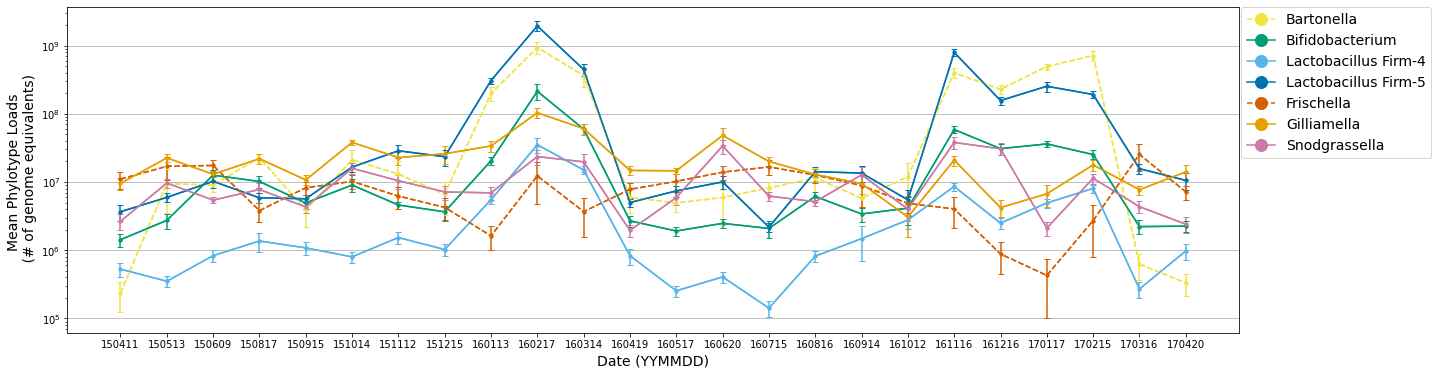

In [11]:
plt.rcParams["figure.figsize"] = (21, 6)

#Plotting the data

for key in tar_data_dict.keys():

    if key == 'Ba' or key == 'Fp': #to make dotted lines for non-major groups
        line = '--'
    else:
        line = '-'

    fig = plt.plot_date(tar_data_dict[key][0],tar_data_dict[key][1], marker= '.',linestyle = line, xdate='True', 
                        color = tar_cols_df[tar_cols_df['Targets']==key].iloc[0][1], label = key )

    plt.errorbar(tar_data_dict[key][0],tar_data_dict[key][1],yerr=tar_data_dict[key][2] , 
                    marker= '.',linestyle = line,color = tar_cols_df[tar_cols_df['Targets']==key].iloc[0][1],capsize = 3)

    plt.legend(labels = ['Bartonella','Bifidobacterium','Lactobacillus Firm-4','Lactobacillus Firm-5','Frischella','Gilliamella','Snodgrassella'],
                        bbox_to_anchor= (1.17,1.02), markerscale = 4, fontsize = 14)

    plt.xlabel("Date (YYMMDD)", fontsize = 14)
    plt.ylabel('Mean Phylotype Loads \n (# of genome equivalents)', fontsize = 14)
    plt.yticks([1e+05,1e+06,1e+07,1e+08,1e+09])
    plt.yscale('log')


plt.grid(linestyle = '-', axis = 'y')

plt.savefig('fig1A.jpg', dpi = 1000, bbox_inches='tight')
plt.show()

# Figure 2 : PCA Analysis 

In [12]:
test = dt1.sort_values(by = ['Sample_ID'])

gm = pd.DataFrame(columns = ['Sample_ID',"Ba",'Bi',"F4","F5",'Fp',"Ga","Sa"])

s_ids = test.Sample_ID.unique()

#Make a dataframe where the columns are the targets and the values are the Cell Numbers with Sample ID as the index
tgt = ["Ba",'Bi',"F4","F5",'Fp',"Ga","Sa"]
cell_num_list = []
for s_id in s_ids:
    cell_num_list.append(s_id)
    
    for tar in tgt:

        cellnum = test[(test['Sample_ID']== s_id) & (test['Target']==tar)].iloc[0][-1]
        cell_num_list.append(cellnum)
        
    df_length = len(gm)
    gm.loc[df_length] = cell_num_list
    cell_num_list = []

In [13]:

#creating a list of all the bee types
gmBeeType =[]
for s_id in s_ids:
    beetype = test[(test['Sample_ID'] == s_id)].iloc[0][5]
    gmBeeType.append(beetype)


In [14]:
gm = gm.replace(to_replace= 0, value = 1) #Replacing all the 0s for 1s
gm = gm.drop('Sample_ID', axis = 1) #dropping the Sample_ID axis and only using indexing 
gmlog = np.log(gm)
gmlog # dataframe containing log values of gm dataframe to make the data easier to visualize

,Ba,Bi,F4,F5,Fp,Ga,Sa
0,9.654834,13.331900,11.052365,12.414435,15.260841,14.524255,13.566190
1,9.580869,14.023129,14.128278,14.614330,16.179373,15.522661,14.384861
2,0.000000,13.635119,0.000000,12.926502,12.943050,14.906581,14.454240
3,9.215129,15.250990,13.941122,16.127767,17.577500,17.619814,16.573243
4,11.914275,12.954028,11.406998,12.637306,9.805654,15.529027,14.093938
...,...,...,...,...,...,...,...
561,11.722927,14.310745,13.868738,15.580330,0.000000,16.823472,13.967119
562,10.729219,15.572294,13.902398,14.702439,14.443954,15.903321,13.089355
563,14.190242,12.270014,10.543392,13.594798,0.000000,14.611839,13.778091
564,11.097228,14.714456,13.728117,17.213258,17.008349,17.244424,14.255308


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Normalizing data
scaled_datapoints_df= sc.fit_transform(gmlog)

#Performing PCA on the data
pca = PCA(n_components=7)
PC_data = pca.fit_transform(scaled_datapoints_df)
columns_pca = ['PC %i' % i for i in range(1, 8)]

# Making PCA data into a dataframe
pca_df = pd.DataFrame(PC_data, columns=columns_pca)

# Calculating variance percentage to use in the plot later
varinace_percentage = np.round(pca.explained_variance_ratio_* 100, decimals=1)


In [16]:
# inserting the Bee type list in Principal Components dataframe.
pca_df.insert(7, 'Bee_type', gmBeeType)

In [17]:
pca_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,Bee_type
0,3.106313,0.445716,-0.918937,-0.019273,0.127243,-0.344176,-0.413396,F
1,1.621272,-0.041082,-0.855733,0.349245,0.972009,-0.417552,-0.061005,F
2,5.566996,-0.832042,0.709623,-0.613690,-0.549119,3.069567,-1.611187,F
3,0.396637,-1.792759,-0.117690,0.334278,1.129750,0.002747,-0.228381,F
4,2.613104,0.338150,0.082992,0.077919,-0.211046,-0.753597,-0.070264,F
...,...,...,...,...,...,...,...,...
561,0.844856,0.903618,1.422607,0.970573,0.350639,-0.485847,-0.077083,F
562,1.187030,0.426137,-0.914320,1.101945,0.437433,-0.224417,-0.741401,F
563,2.563058,1.669937,1.077060,-0.372612,-0.670352,-0.541776,0.384971,F
564,0.550916,-0.673001,-0.561764,1.211692,0.590308,0.329200,0.326418,F


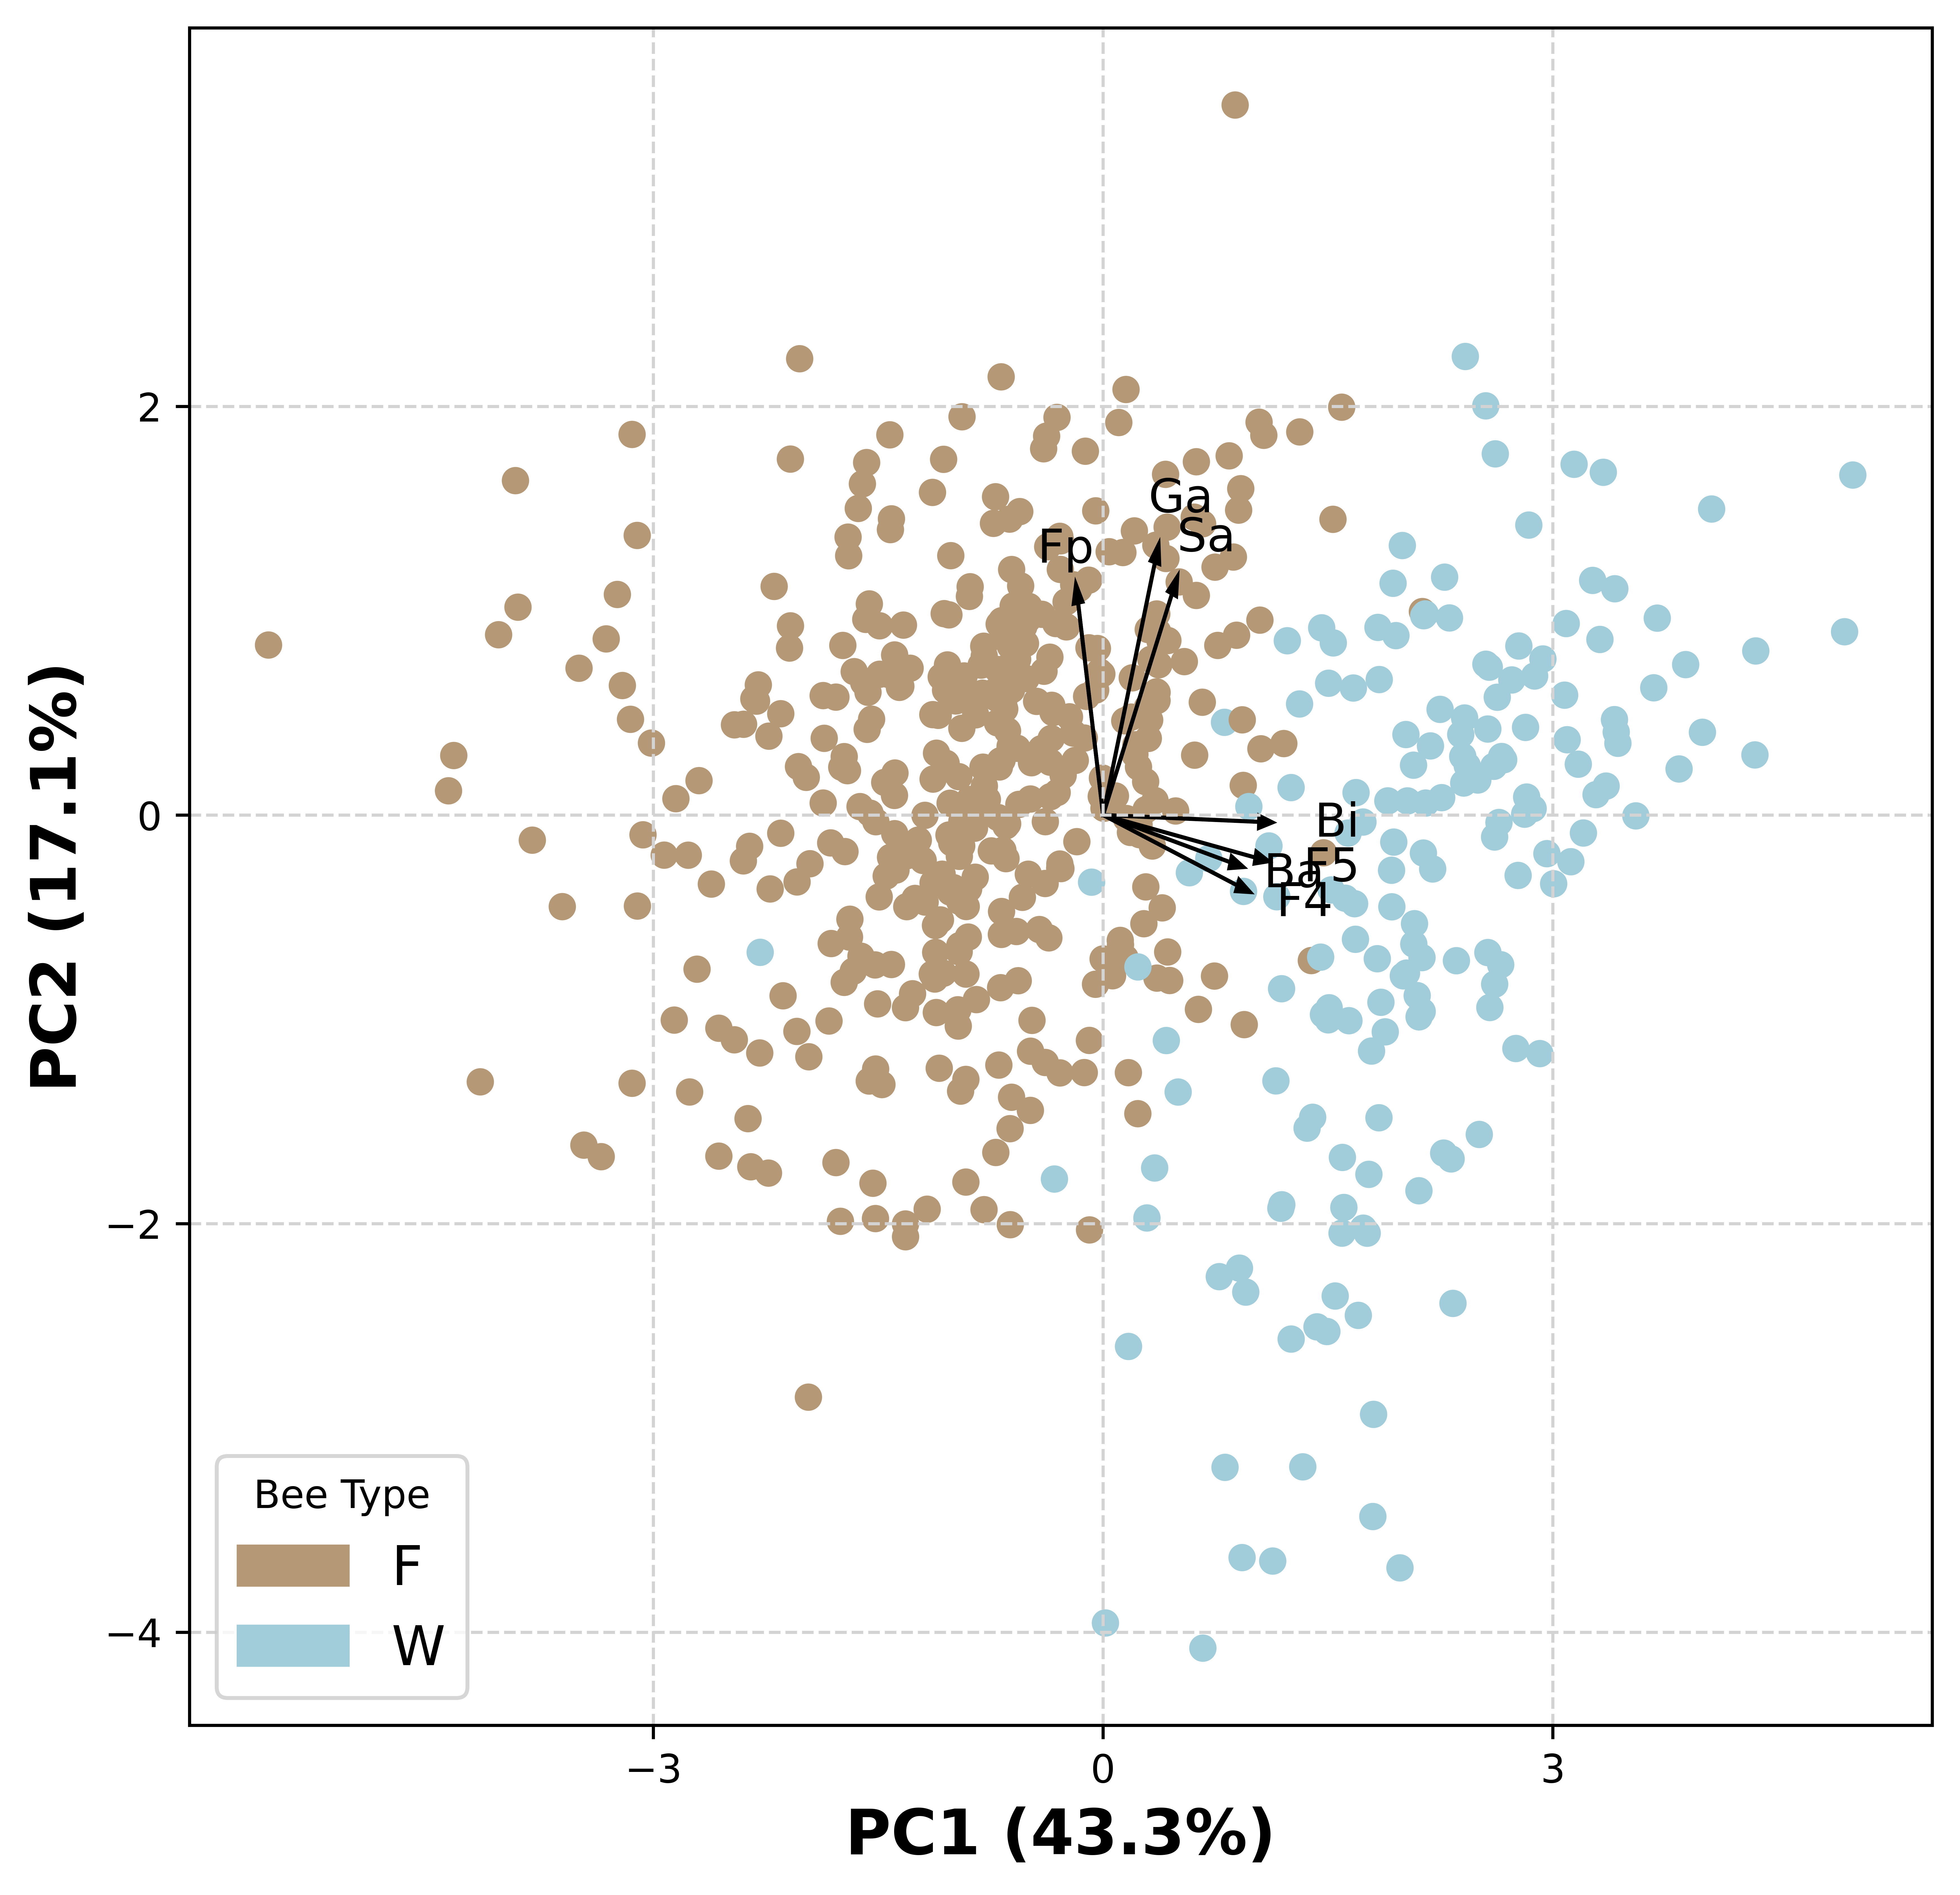

In [18]:
#PLotting PC 1 vs PC 2
plt.figure(figsize= [8,8], dpi = 1000)
plt.xlabel('PC1 ({0}%)'.format(varinace_percentage[0]),fontsize = 16 ,fontweight = 'bold')
plt.ylabel('PC2 ({0}%)'.format(varinace_percentage[1]),fontsize = 16 ,fontweight = 'bold')
plt.grid(color = '#D3D3D3', linestyle = '--')
pca_cols = { 'F' : "#B59875", 'W' : "#A0CDD9"}

plt.scatter(-pca_df["PC 1"], -pca_df["PC 2"], c = pca_df['Bee_type'].map(pca_cols))
plt.xticks([-3,0,3])
plt.yticks([-4,-2,0,2,4])

#adding legend
cp = []
for color_key in pca_cols:
    color_patch = mpatches.Patch(color=pca_cols[color_key], label= color_key)
    cp.append(color_patch)
plt.legend(handles = cp, title = 'Bee Type', fontsize = 14, loc = 3)
# plt.grid(color = '#D3D3D3')


#Plotting Projections
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
for i in range(n):
        plt.arrow(0, 0, -coeff[i,0] * 2, -coeff[i,1] * 2,color = 'black', head_width = 0.06)
        
        plt.text(-coeff[i,0]* 3, -coeff[i,1] * 2.5 , targets[i], color = 'black', ha = 'center', va = 'center', fontsize = 12)


plt.savefig('fig2.jpg', dpi = 1000, bbox_inches='tight')
plt.show()


# Figure 1B : Relative Abundance Analysis

In [19]:
dt1

,Target,Dataset,Sample_ID,Hive,Date,Bee_type,Scab,gut_mg,Extractor,Cq,SD,actin_Cq,actin_CopyNum,CopyNum,CellNum,Present,CopyNum_norm,CellNum_norm
0,Ba,mm,1,DdM,150411,F,0,NaN,PLO,29.706233,0.076765,20.679800,9.914533e+06,3.199835e+04,1.599918e+04,1,31194,15597
1,Ba,mm,596,DdM,170420,F,1,NaN,M,27.367200,0.090368,19.732867,1.817049e+07,1.717219e+05,8.586095e+04,1,91342,45671
2,Ba,mm,506,DdM,161216,W,0,NaN,M,15.568233,0.019914,20.673167,9.956696e+06,8.235654e+08,4.117827e+08,1,799455269,399727635
3,Ba,mm,233,DdM,160113,W,0,NaN,M,15.196967,0.052419,20.826900,9.024065e+06,1.075277e+09,5.376387e+08,1,1151674188,575837094
4,Ba,mm,371,DdM,160715,F,1,NaN,P,26.112967,0.112793,22.766950,2.608447e+06,4.227693e+05,2.113846e+05,1,1566508,783254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,Sa,mm,502,DdM,161216,W,1,NaN,M,18.550167,0.010782,19.183833,2.581720e+07,1.203451e+08,3.008627e+07,1,45053700,11263425
3958,Sa,mm,32,DdM,150513,F,1,NaN,PLO,20.798833,0.027966,20.513267,1.102914e+07,2.631824e+07,6.579560e+06,1,23063571,5765893
3959,Sa,mm,26,DdM,150513,F,0,NaN,PLO,21.691067,0.036193,20.441667,1.154609e+07,1.439832e+07,3.599580e+06,1,12052810,3013203
3960,Sa,mm,394,DdM,160816,F,1,NaN,M,22.375400,0.010607,19.443500,2.186572e+07,9.065731e+06,2.266433e+06,1,4007286,1001822


In [20]:
test1 = dt1.sort_values(by = ['Sample_ID'])

gm1= pd.DataFrame(columns = ['Sample_ID',"Ga","Sa","Bi","F4","F5","Ba","Fp"])

s_ids = test1.Sample_ID.unique()

#Make a dataframe where the columns are the targets and the values are the Cell Numbers with Sample ID as the index
tgt = ["Ga","Sa","Bi","F4","F5","Ba","Fp"]
cell_num_list = []
for s_id in s_ids:
    cell_num_list.append(s_id)
    
    for tar in tgt:

        cellnum = test1[(test['Sample_ID']== s_id) & (test1['Target']==tar)].iloc[0][-1]
        cell_num_list.append(cellnum)
        
    df_length = len(gm1)
    gm1.loc[df_length] = cell_num_list
    cell_num_list = []



In [21]:
gm1

,Sample_ID,Ga,Sa,Bi,F4,F5,Ba,Fp
0,1,2031440,779330,616553,63093,246332,15597,4243254
1,2,5513229,1767119,1230743,1367203,2222915,14485,10631941
2,3,2977461,1894073,834943,0,411063,0,417922
3,4,44893974,15764054,4201659,1133842,10097186,10048,43033942
4,5,5548436,1321051,422535,89949,307831,149384,18136
...,...,...,...,...,...,...,...,...
561,595,20246090,1163705,1640883,1054670,5840517,123368,0
562,596,8067229,483765,5793773,1090774,2427662,45671,1874690
563,597,2217384,963272,213206,37926,801947,1454601,0
564,598,30843103,1552392,2457011,916316,29896691,65988,24357461


In [22]:
gm1= gm1.drop('Sample_ID', axis = 1)
gm1

,Ga,Sa,Bi,F4,F5,Ba,Fp
0,2031440,779330,616553,63093,246332,15597,4243254
1,5513229,1767119,1230743,1367203,2222915,14485,10631941
2,2977461,1894073,834943,0,411063,0,417922
3,44893974,15764054,4201659,1133842,10097186,10048,43033942
4,5548436,1321051,422535,89949,307831,149384,18136
...,...,...,...,...,...,...,...
561,20246090,1163705,1640883,1054670,5840517,123368,0
562,8067229,483765,5793773,1090774,2427662,45671,1874690
563,2217384,963272,213206,37926,801947,1454601,0
564,30843103,1552392,2457011,916316,29896691,65988,24357461


In [23]:
col_list = list(gm1)

#add a column that has the row-wise sum 
gm1["sum"] = gm1[col_list].sum(axis=1)
gm1

,Ga,Sa,Bi,F4,F5,Ba,Fp,sum
0,2031440,779330,616553,63093,246332,15597,4243254,7995599.0
1,5513229,1767119,1230743,1367203,2222915,14485,10631941,22747635.0
2,2977461,1894073,834943,0,411063,0,417922,6535462.0
3,44893974,15764054,4201659,1133842,10097186,10048,43033942,119134705.0
4,5548436,1321051,422535,89949,307831,149384,18136,7857322.0
...,...,...,...,...,...,...,...,...
561,20246090,1163705,1640883,1054670,5840517,123368,0,30069233.0
562,8067229,483765,5793773,1090774,2427662,45671,1874690,19783564.0
563,2217384,963272,213206,37926,801947,1454601,0,5688336.0
564,30843103,1552392,2457011,916316,29896691,65988,24357461,90088962.0


In [24]:
#Calculate the relative abundance by divind each value by sum calculated above
percentages_df = gm1[col_list].div((gm1['sum']), axis = 0)


In [25]:
percentages_df.insert(0 ,'Sample_ID', s_ids)

In [26]:
percentages_df

,Sample_ID,Ga,Sa,Bi,F4,F5,Ba,Fp
0,1,0.25407,0.09747,0.077112,0.007891,0.030808,0.001951,0.530699
1,2,0.242365,0.077684,0.054104,0.060103,0.097721,0.000637,0.467387
2,3,0.455585,0.289815,0.127756,0.0,0.062897,0.0,0.063947
3,4,0.376834,0.132321,0.035268,0.009517,0.084754,0.000084,0.361221
4,5,0.706148,0.16813,0.053776,0.011448,0.039178,0.019012,0.002308
...,...,...,...,...,...,...,...,...
561,595,0.673316,0.038701,0.05457,0.035075,0.194236,0.004103,0.0
562,596,0.407774,0.024453,0.292858,0.055135,0.122711,0.002309,0.09476
563,597,0.389812,0.169342,0.037481,0.006667,0.140981,0.255716,0.0
564,598,0.342363,0.017232,0.027273,0.010171,0.331857,0.000732,0.270371


In [27]:
#Creating a deictionary to later plot vertical lines for division of month
ba_dates_samples = dtDetected[['Target','Date', 'Sample_ID']]
ba_dates_samples = ba_dates_samples.loc[ba_dates_samples['Target'] == 'Ba']
ba_dates_samples = ba_dates_samples.drop_duplicates()
ba_dates_samples = ba_dates_samples.sort_values(by = "Sample_ID")
bds = ba_dates_samples['Date'].unique()
month_end_samples =  ba_dates_samples.set_index('Date').to_dict()['Sample_ID']

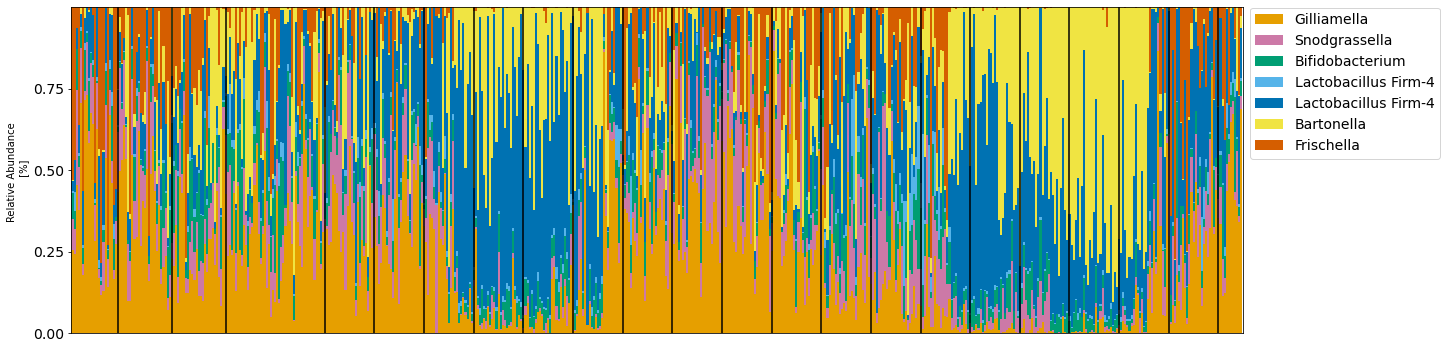

In [28]:
#Plotting the data
color_dict= {"Ba":'#F0E442',
"Bi":'#009E73',"F4":'#56B4E9',"F5":'#0072B2', "Fp":'#D55E00', "Ga":'#E69F00', "Sa":'#CC79A7'}

fig1b = percentages_df.plot(
    x = 'Sample_ID',
    kind = 'bar',
    stacked = True,
    linewidth = 0, 
    width = 1, fontsize = 14,
    xticks = [], xlabel = '',
    ylabel = "Relative Abundance \n [%]", yticks = [0,.25,.50,.75,1.],
    color=[color_dict.get(x) for x in percentages_df.columns[1:]])

fig1b.legend(['Gilliamella','Snodgrassella','Bifidobacterium', 'Lactobacillus Firm-4', 'Lactobacillus Firm-4', 'Bartonella', 'Frischella'],
                    bbox_to_anchor= (1,1.02), fontsize = 14)

fig1b.vlines(month_end_samples.values(),0,1, color = 'black')

plt.savefig('fig1B.jpg', dpi = 1000, bbox_inches='tight')
plt.show()